In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set (font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest' ]
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

print(class_names_label)

IMAGE_SIZE = (128, 128)

{'mountain': 0, 'street': 1, 'glacier': 2, 'buildings': 3, 'sea': 4, 'forest': 5}


In [ ]:
def load_data() :
  DIRECTORY = "/content/drive/MyDrive/AiFinalProject/Dataset"
  categories = ["seg_train", "seg_test"]

  output = []

  for category in categories:
    path = os.path.join(DIRECTORY, category)
    images = []
    labels = []

    print("Loading {}".format(category))

    for folder in tqdm(os.listdir(path)):
      label = class_names_label[folder]

      for file in os.listdir(os.path.join(path, folder)):

        img_path = os.path.join(os.path.join(path, folder), file)

        # read and resize
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, IMAGE_SIZE)

        # append to list
        images.append(image)
        labels.append(label)

    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype= 'int32')

    output.append((images, labels))

  return output

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

Loading seg_train


100%|██████████| 6/6 [03:25<00:00, 34.22s/it]


Loading seg_test


100%|██████████| 6/6 [00:35<00:00,  5.92s/it]


In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state = 25)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((13787, 128, 128, 3), (13787,), (3000, 128, 128, 3), (3000,))

In [ ]:
len(x_train), len(y_train), len(x_test), len(y_test)

(13787, 13787, 3000, 3000)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation = tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0

In [ ]:

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs=45, validation_split = 0.2)

Epoch 1/45
87/87 [==============================] - 16s 91ms/step - loss: 15.3815 - accuracy: 0.1968 - val_loss: 1.7782 - val_accuracy: 0.2763
Epoch 2/45
87/87 [==============================] - 6s 65ms/step - loss: 1.7491 - accuracy: 0.2596 - val_loss: 1.7094 - val_accuracy: 0.2904
Epoch 3/45
87/87 [==============================] - 6s 70ms/step - loss: 1.7077 - accuracy: 0.2945 - val_loss: 1.6515 - val_accuracy: 0.3542
Epoch 4/45
87/87 [==============================] - 6s 68ms/step - loss: 1.6754 - accuracy: 0.3269 - val_loss: 1.6152 - val_accuracy: 0.3720
Epoch 5/45
87/87 [==============================] - 6s 72ms/step - loss: 1.6113 - accuracy: 0.3499 - val_loss: 1.4494 - val_accuracy: 0.4007
Epoch 6/45
87/87 [==============================] - 6s 68ms/step - loss: 1.4985 - accuracy: 0.3943 - val_loss: 1.3482 - val_accuracy: 0.4880
Epoch 7/45
87/87 [==============================] - 6s 65ms/step - loss: 1.4071 - accuracy: 0.4209 - val_loss: 1.3438 - val_accuracy: 0.5036
Epoch 8/45


In [ ]:
def plot_accuracy_loss(history):
  """
      Plot the accuracy and the loss durring training
  """
  fig = plt.figure(figsize = (10,5))

  #Plot accuracy
  plt.subplot(221)
  plt.plot(history.history['accuracy'],'bo--', label = 'acc')
  plt.plot(history.history['val_accuracy'],'ro--', label = 'val_acc')
  plt.title("train_acc vs val_acc")
  plt.ylabel("accuracy")
  plt.xlabel("epochs")
  plt.legend()

  # Plot loss
  plt.subplot(222)
  plt.plot(history.history['loss'],'bo--', label = 'loss')
  plt.plot(history.history['val_loss'],'ro--', label = 'val_loss')
  plt.title("train_loss vs val_loss")
  plt.ylabel("loss")
  plt.xlabel("epochs")

  plt.legend()
  plt.show()



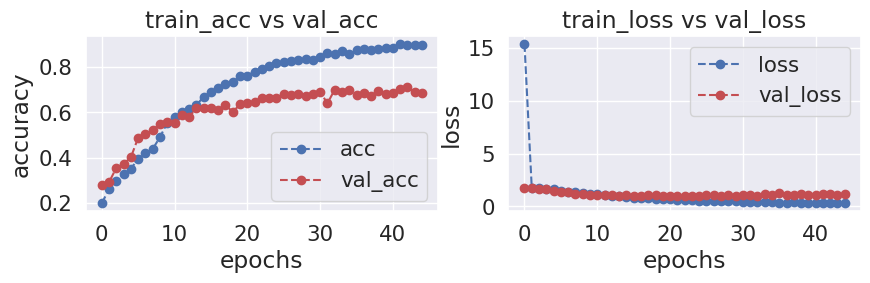

In [ ]:
plot_accuracy_loss(history)

In [ ]:
test_loss = model.evaluate(x_test, y_test)

94/94 [==============================] - 1s 8ms/step - loss: 1.0748 - accuracy: 0.6900


In [ ]:
print(classification_report(y_test, pred_labels))

              precision    recall  f1-score   support

           0       0.60      0.75      0.66       525
           1       0.70      0.75      0.73       501
           2       0.75      0.53      0.62       553
           3       0.64      0.69      0.66       437
           4       0.70      0.53      0.60       510
           5       0.78      0.93      0.85       474

    accuracy                           0.69      3000
   macro avg       0.69      0.70      0.69      3000
weighted avg       0.70      0.69      0.68      3000



In [ ]:
model.save('my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/AiFinalProject/my_model.h5')

In [ ]:
imgaaaa = x_test[6]
print((imgaaaa[np.newaxis, :, :, :]).shape)
imgaaaa = (imgaaaa[np.newaxis, :, :, :])
print(imgaaaa)
imgaaaa_list = imgaaaa.tolist()
print(imgaaaa_list)

(1, 128, 128, 3)
[[[[ 97. 158. 239.]
   [ 97. 158. 239.]
   [ 98. 159. 240.]
   ...
   [100. 158. 232.]
   [100. 158. 232.]
   [100. 158. 232.]]

  [[ 98. 158. 239.]
   [ 98. 159. 240.]
   [ 98. 159. 240.]
   ...
   [100. 157. 233.]
   [100. 157. 234.]
   [100. 157. 233.]]

  [[ 99. 157. 241.]
   [100. 158. 242.]
   [100. 158. 242.]
   ...
   [100. 156. 235.]
   [100. 156. 236.]
   [101. 156. 235.]]

  ...

  [[ 45.  53.  34.]
   [ 13.  20.   4.]
   [ 44.  52.  26.]
   ...
   [ 33.  41.  17.]
   [ 25.  34.  12.]
   [ 69.  78.  51.]]

  [[ 57.  64.  49.]
   [ 19.  26.   7.]
   [ 56.  62.  39.]
   ...
   [ 58.  69.  27.]
   [ 64.  76.  34.]
   [ 77.  88.  46.]]

  [[ 33.  39.  25.]
   [ 28.  34.  19.]
   [ 15.  20.   3.]
   ...
   [ 78.  91.  38.]
   [ 62.  74.  21.]
   [ 69.  82.  29.]]]]
[[[[97.0, 158.0, 239.0], [97.0, 158.0, 239.0], [98.0, 159.0, 240.0], [97.0, 158.0, 239.0], [97.0, 158.0, 239.0], [97.0, 158.0, 239.0], [98.0, 159.0, 240.0], [98.0, 159.0, 240.0], [98.0, 159.0, 240.0], 

In [ ]:
pree = loaded_model.predict(imgaaaa_list)
print(pree)

1/1 [==============================] - 0s 26ms/step
[[3.5182445e-03 2.5640056e-02 4.1046336e-01 4.3345612e-01 1.2685306e-01
  6.9142530e-05]]


In [ ]:
pree = loaded_model.predict(imgaaaa)
print(pree)

1/1 [==============================] - 0s 20ms/step
[[3.5182445e-03 2.5640056e-02 4.1046336e-01 4.3345612e-01 1.2685306e-01
  6.9142530e-05]]
